# Import necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore

# Prepare the data

For graphic representations we can read/open the Log 2 transformed data we saved with the Data_graphic_representation notebook. Then, data needs to be filtered as it is really large to graph it. That's why we pick the most representative samples based on their mean, obtaining 31 samples.

In [2]:
file_path = '/Volumes/TOSHIBA EXT/4t curs/Advanced Bioinformatics/Project/Python/log2expressiondata.csv'
log_df = pd.read_csv(file_path, index_col = 0)
log_df.head(5)

,77322072-2a7f-49e6-a9d1-c521c25acd70.rna_seq.augmented_star_gene_counts.tsv,6f6bf240-1ca4-47d0-9a77-17b0ce9b8ae7.rna_seq.augmented_star_gene_counts.tsv,59e8b7b7-5183-4655-aa5e-e4b5ba73eded.rna_seq.augmented_star_gene_counts.tsv,5418228b-cfd0-4580-87c6-3ebf6282ad73.rna_seq.augmented_star_gene_counts.tsv,c7fd0bf8-753e-45d6-b987-51ec7559f728.rna_seq.augmented_star_gene_counts.tsv,50c308c9-922a-4083-ae09-e5e4d8c437af.rna_seq.augmented_star_gene_counts.tsv,55071ef3-bf09-43a2-a54c-a9ec61a84615.rna_seq.augmented_star_gene_counts.tsv,7d9c7c34-76e0-4622-b5f7-60e12f6d4e07.rna_seq.augmented_star_gene_counts.tsv,32675d71-6f79-4b8f-ab7c-e2350b15875c.rna_seq.augmented_star_gene_counts.tsv,3d11905a-16eb-40b2-a36b-e37dca6359d3.rna_seq.augmented_star_gene_counts.tsv,...,4c87674d-dd05-490d-a584-84490509f4d4.rna_seq.augmented_star_gene_counts.tsv,5cfb768f-7b49-4a72-92c9-d7502f5ba5b8.rna_seq.augmented_star_gene_counts.tsv,03ef99c7-55b7-4770-9eac-2ee007aa78ca.rna_seq.augmented_star_gene_counts.tsv,3ab1dfbc-ab83-446e-b680-cd6aec12b177.rna_seq.augmented_star_gene_counts.tsv,029a2c3e-0fd1-4cb4-9021-3947d28ca28d.rna_seq.augmented_star_gene_counts.tsv,ed41fe8b-fe2e-4bf3-91e3-2cf50ddcbc78.rna_seq.augmented_star_gene_counts.tsv,b9a5766c-e155-423e-a075-10fb14fe87df.rna_seq.augmented_star_gene_counts.tsv,a462c0f9-23d3-428b-9b61-e42cb6a68af1.rna_seq.augmented_star_gene_counts.tsv,0d3cfbc0-4420-48ed-a459-2e18d2ece5b6.rna_seq.augmented_star_gene_counts.tsv,d43517e2-e447-42cc-93e1-cbc9669ef4f1.rna_seq.augmented_star_gene_counts.tsv
gene_id,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003.15,5.853883,6.242844,5.877366,5.554976,3.746270,5.778416,6.605066,6.116313,5.103242,5.100397,...,5.004560,5.073456,5.734804,5.092191,5.545338,5.857862,5.716747,5.352275,5.517622,3.911040
ENSG00000000005.6,0.000000,0.222557,0.000000,0.000000,0.107688,0.088956,0.000000,0.000000,0.000000,1.341758,...,0.000000,0.000000,0.035061,0.055335,0.065021,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000000419.13,6.474339,6.794343,7.083010,7.648951,5.943865,5.608244,6.771603,6.813068,5.584301,6.713725,...,6.198396,6.507392,6.843400,6.794808,6.137436,6.854949,6.647530,6.690696,7.539495,6.633021
ENSG00000000457.14,3.294180,3.387142,3.666132,4.221467,2.147893,2.470016,4.229765,3.583724,2.693632,4.618344,...,2.987357,2.368098,3.344133,3.016461,2.465060,3.315856,2.725916,2.816661,2.570171,2.630732
ENSG00000000460.17,2.783813,2.667915,2.528596,2.275037,1.197425,1.931305,4.033529,3.424828,1.687509,4.613820,...,3.734807,2.546240,3.385155,2.828977,1.683876,3.925373,2.505129,2.827535,3.220438,2.804818


In [3]:
means_by_samples = log_df.mean()
samples_mean = means_by_samples.mean()
print (samples_mean)

rep_samples = (means_by_samples >= samples_mean - 0.01) & (means_by_samples <= samples_mean + 0.01)
print(pd.Series(rep_samples).value_counts())

subset = log_df.loc[:, rep_samples]
subset.insert(0, 'row_numbers', [index for index, _ in enumerate(subset.index)])
subset.head(5)

2.6330752957995553
False    1914
True       83
Name: count, dtype: int64


,row_numbers,f0395da6-5f12-4a35-8aa6-0b1b47a2acba.rna_seq.augmented_star_gene_counts.tsv,fec7a02d-1d67-412d-9d69-df7124864e7a.rna_seq.augmented_star_gene_counts.tsv,2276a330-e86b-46e1-be45-ae41d217ef66.rna_seq.augmented_star_gene_counts.tsv,06f0836c-ae3f-4c83-bb20-a5a74796bb11.rna_seq.augmented_star_gene_counts.tsv,1084d48c-88e8-4d67-9049-d0e4cd7f9535.rna_seq.augmented_star_gene_counts.tsv,c41a2347-8277-494e-90c6-f1918223388b.rna_seq.augmented_star_gene_counts.tsv,131b98d5-aaf4-4a6c-bb96-c33895cd814a.rna_seq.augmented_star_gene_counts.tsv,58e4f0e6-3b0f-4370-8abf-0b4d533672c5.rna_seq.augmented_star_gene_counts.tsv,8a44c8a0-142b-48bb-9809-69914811bacc.rna_seq.augmented_star_gene_counts.tsv,...,ce8c79f1-aebf-4824-aa7a-5eb528c7015a.rna_seq.augmented_star_gene_counts.tsv,cc6afa2d-449a-46eb-b532-2571ab63838d.rna_seq.augmented_star_gene_counts.tsv,fb5ab2bb-9c22-41cc-8955-4237f2426ee2.rna_seq.augmented_star_gene_counts.tsv,a77e253d-d9c6-4803-87aa-af6169b5546c.rna_seq.augmented_star_gene_counts.tsv,0dab5bf8-abc8-4fba-aa61-8f248378d942.rna_seq.augmented_star_gene_counts.tsv,099ea203-5488-41bd-a07d-c4b707faa375.rna_seq.augmented_star_gene_counts.tsv,6ee211fb-528c-4c24-a197-62967c795eb4.rna_seq.augmented_star_gene_counts.tsv,5c6bb775-aaa5-4b5f-90be-86926549ae90.rna_seq.augmented_star_gene_counts.tsv,4e07237d-2c58-412d-b8cf-8dcee0f52fdd.rna_seq.augmented_star_gene_counts.tsv,5d83245d-083a-4728-9637-d1c1c2f69d9f.rna_seq.augmented_star_gene_counts.tsv
gene_id,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003.15,0,6.079143,5.651812,5.091446,4.292104,5.561390,6.051590,5.529484,5.173123,6.941700,...,6.000796,6.038673,4.242092,4.444607,5.342978,5.107458,4.352886,5.760969,6.119562,5.826683
ENSG00000000005.6,1,0.253989,0.000000,0.000000,0.126841,0.076696,0.000000,0.054918,0.045723,0.000000,...,0.294430,0.000000,0.054501,0.090853,0.072586,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000000419.13,2,7.096947,6.800464,6.449355,6.140143,6.957397,6.849279,5.881070,7.065830,5.719101,...,7.119322,7.552545,6.392238,6.558571,6.306991,6.501371,7.278851,6.580714,7.124104,6.839325
ENSG00000000457.14,3,2.634686,3.223654,3.120037,3.185153,3.547425,3.811707,2.918329,3.029806,2.750178,...,2.983933,2.974529,3.073375,2.924974,3.142234,3.953805,3.387266,3.085951,2.651545,2.957915
ENSG00000000460.17,4,2.966523,2.921360,2.118725,1.482332,2.980336,3.233397,2.103464,2.891886,2.255863,...,3.106650,3.687419,1.291309,2.766129,3.571701,4.038067,3.979879,2.871627,2.769624,2.815780


# Graphic representations of data distribution
## Density plot

With the density plot we can visualize the gene expression values per sample and explore their distribution characteristics to know how the data looks like. We can see that most genes have expression values about 0 to 1 TPMs along samples, but TPMs variance of is really wide and distribution is assymetric (right-skewed) due to overexpressed genes. So, that is why the mean of the samples shifts to the right of the mode in the plot.

With that overexpressed genes we are going to be able to identify patterns of discrimination in gene expression, to determine lung cancer subtypes.

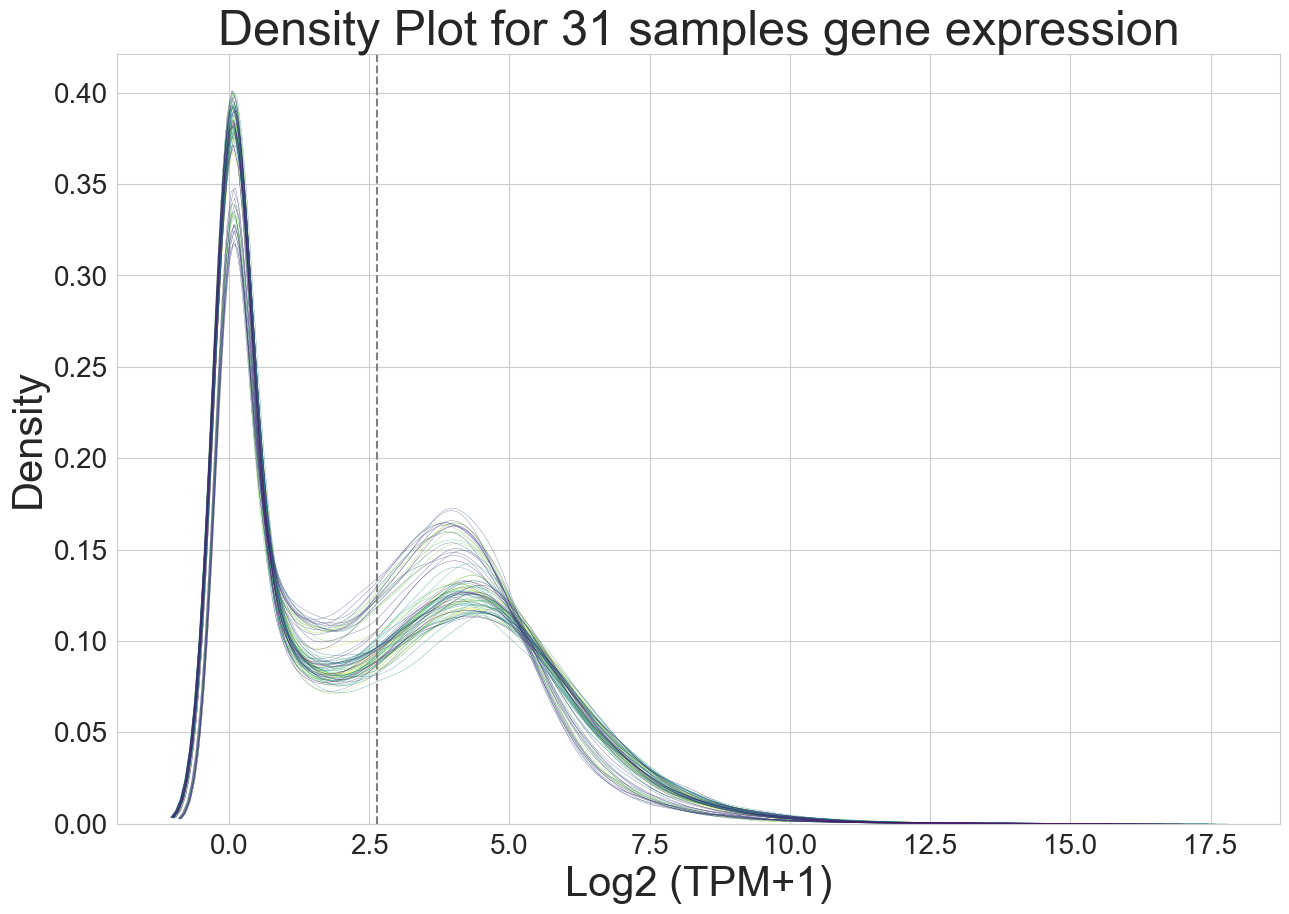

In [4]:
plt.figure(figsize = (15, 10))
sns.set_style('whitegrid')

sns.kdeplot(data = subset.drop(columns=['row_numbers']), common_norm = False, legend = False, palette = 'viridis', linewidth = .2)
plt.axvline(x = samples_mean, color = 'grey', linestyle = '--')

plt.title('Density Plot for 31 samples gene expression', fontsize = 35)
plt.xlabel('Log2 (TPM+1)', fontsize = 30)
plt.ylabel('Density', fontsize = 30)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.savefig('/Volumes/TOSHIBA EXT/4t curs/Advanced Bioinformatics/Project/Python/Graphs/densityplot.png')

## Boxplot

The boxplot, shows as a summary how TPM data spread out for each sample. We can compare the samples as the boxplot divides the data into sections. Interesting ones for the type of data we have are the IQR and outliers. All samples look alike as we have picked samples with a mean of 1.33 +-0.01: IQR starts from 0 and goes to nearly 2.5 as most genes expression values are in this range. In contrast to the density plot, focusing on the boxplots outliers we can see how overexpressed genes values are distributed, that are the ones we are most interested in. We also see that all samples medians are lower than the mean of the samples because of the distribution the data has.

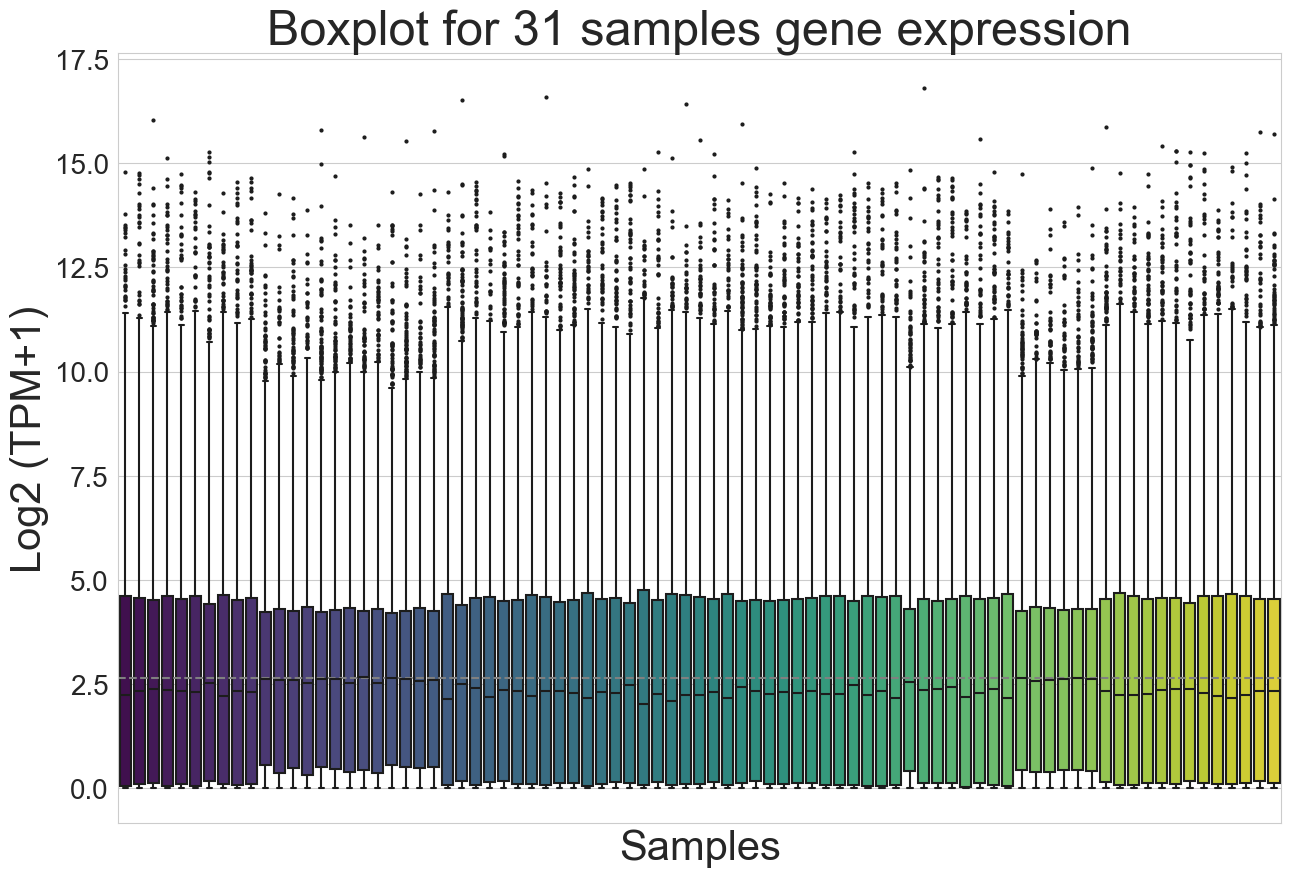

In [5]:
plt.figure(figsize = (15, 10))
sns.set_style('whitegrid')

sns.boxplot(data = subset.drop(columns=['row_numbers']), palette = 'viridis', flierprops = {'marker': 'o', 'markersize': 2})
plt.axhline(y = samples_mean, color = 'grey', linestyle = '--')
plt. xticks([])

plt.title('Boxplot for 31 samples gene expression', fontsize = 35)
plt.ylabel('Log2 (TPM+1)', fontsize = 30)
plt.xlabel('Samples', fontsize = 30)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.savefig('/Volumes/TOSHIBA EXT/4t curs/Advanced Bioinformatics/Project/Python/Graphs/boxplot.png')

# Graphic representations of gene expression

## Filter the data

To do graphic representations for the expression of each gene, we rank the data using a goodness score based on the average and the variance of expression (TPMs) for each gene. So genes with higher scores (top genes) are those that have a wider variance and a higher average around samples. We use a metric of goodness instead of hard thresholds to pick the top genes as it offers a more robust and flexible approach.
Then, we use the scatter plot to visualize how avergage and variance of each gene are dispersed.

In [6]:
average_expression = log_df.sum(axis=1) / log_df.shape[1]
variance_by_rows = log_df.var(axis=1)

genes_exp = pd.DataFrame({
    'Average': average_expression,
    'Variance': variance_by_rows
})
genes_exp.index = log_df.index
genes_exp.insert(0, 'row_numbers', [index for index, _ in enumerate(genes_exp.index)])

genes_exp['Average_Z'] = zscore(genes_exp['Average'])
genes_exp['Variance_Z'] = zscore(genes_exp['Variance'])
genes_exp['Goodness_Score'] = genes_exp['Average_Z'] + genes_exp['Variance_Z']
top_genes = genes_exp.nlargest(500, 'Goodness_Score')
top_genes.head(5)

,row_numbers,Average,Variance,Average_Z,Variance_Z,Goodness_Score
gene_id,,,,,,
ENSG00000202538.1,19535,6.004744,29.512659,1.555496,23.944274,25.499769
ENSG00000200087.1,18421,7.332374,22.752855,2.167983,18.294097,20.462080
ENSG00000212232.1,21832,6.613016,23.094697,1.836115,18.579826,20.415940
ENSG00000200795.1,18742,4.904158,22.855364,1.047752,18.379779,19.427531
ENSG00000168484.12,12366,7.436170,21.264462,2.215868,17.050025,19.265893


## Scatter plot

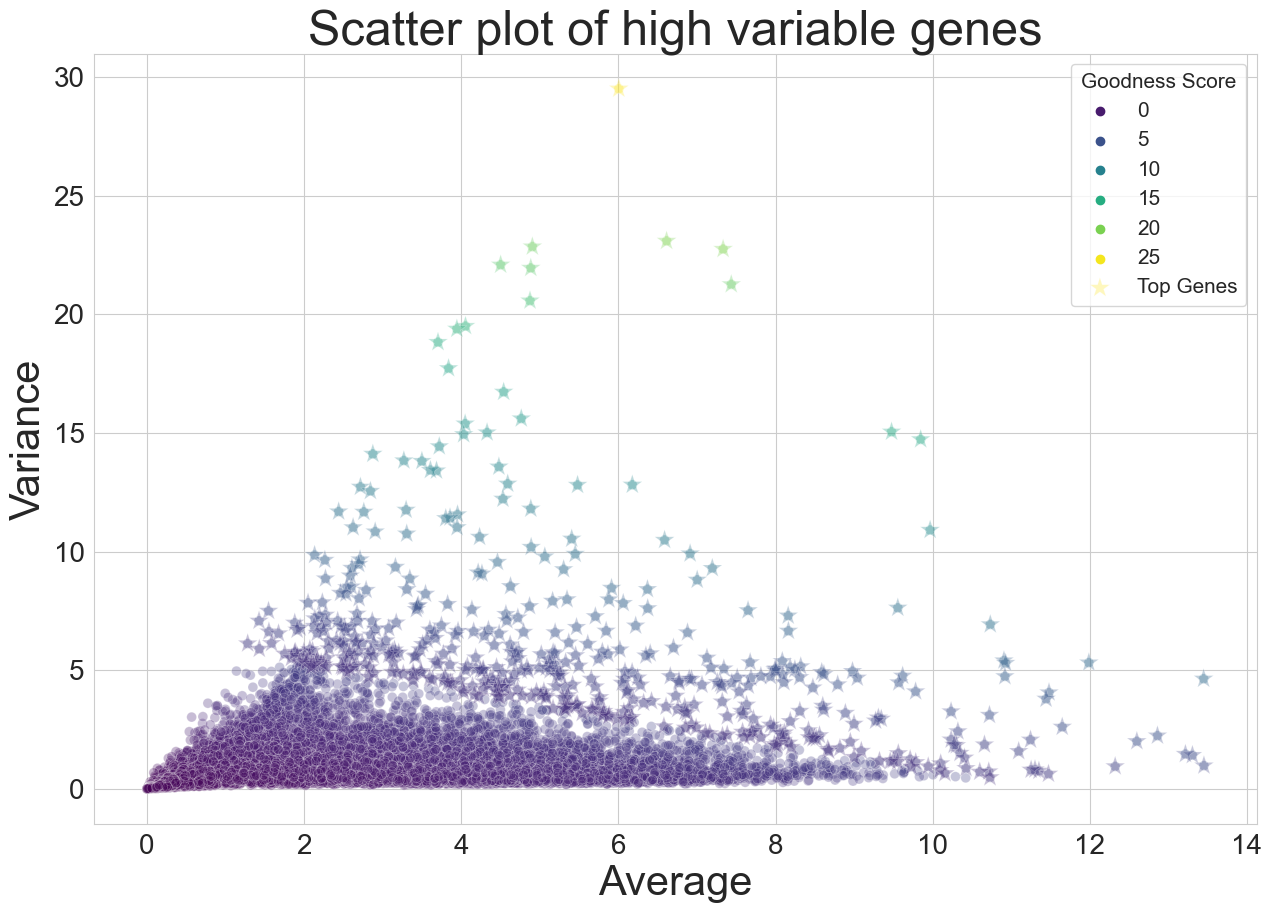

In [7]:
cmap = plt.get_cmap('viridis')
top_genes_colors = cmap(top_genes['Goodness_Score'] / top_genes['Goodness_Score'].max())

plt.figure(figsize=(15, 10))
sns.set_style('whitegrid')

sns.scatterplot(x=genes_exp['Average'], y=genes_exp['Variance'], hue=genes_exp['Goodness_Score'], palette='viridis', s=50, linewidth=0.5, alpha=.3)
plt.scatter(x=top_genes['Average'], y=top_genes['Variance'], color=top_genes_colors, marker='*', s=220, label='Top Genes', linewidth=0.5, edgecolors='white', alpha=.3)  
plt.xlabel('Average', fontsize=30)
plt.ylabel('Variance', fontsize=30)
plt.title('Scatter plot of high variable genes', fontsize=35)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(title='Goodness Score', fontsize=15, title_fontsize=15)  

plt.savefig('/Volumes/TOSHIBA EXT/4t curs/Advanced Bioinformatics/Project/Python/Graphs/scatterplot_gs.png')

## Heatmaps

Heatmaps are really visual, which can be useful to make an exploratory analysis and understand how genes in the data are expressed, as values are depicted by a color scale.
Top genes of representative samples are plotted, so we can see some motifs on how genes are expressed: Few genes are overexpressed around all the samples and various samples show distinct patterns of gene expression. 

In [8]:
common_rows = subset['row_numbers'].isin(top_genes['row_numbers'])
hm_subset = subset[common_rows]
# now he have a 500 x 32 Data frame

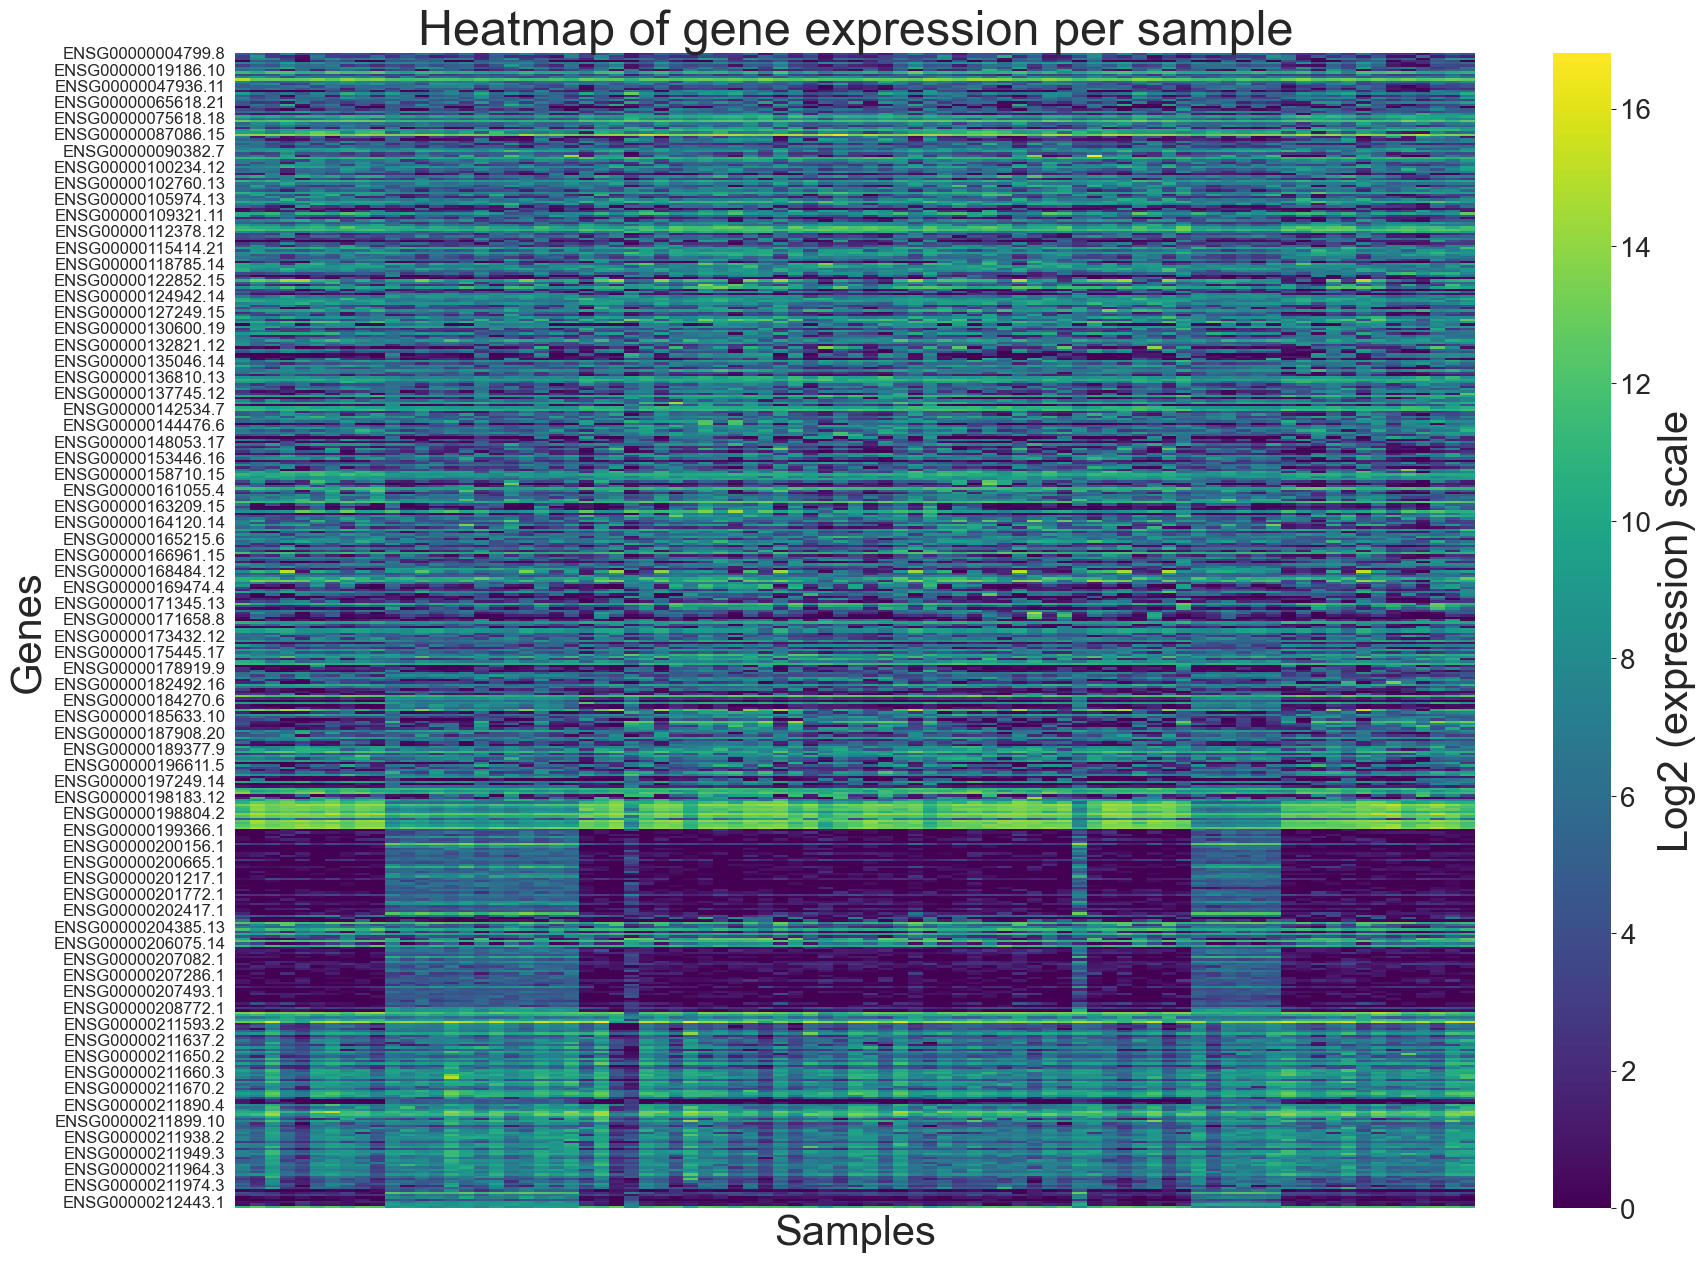

In [9]:
plt.figure(figsize=(20, 15))

heatmap = sns.heatmap(hm_subset.drop(columns=['row_numbers']), cmap='viridis', xticklabels=False)

plt.title('Heatmap of gene expression per sample', fontsize = 35)
plt.xlabel('Samples', fontsize = 30)
plt.ylabel('Genes', fontsize = 30)

cbar = heatmap.collections[0].colorbar
cbar.ax.set_ylabel('Log2 (expression) scale', fontsize=30)
cbar.ax.tick_params(labelsize=20)
plt.yticks(fontsize=12)  #delete yticks

plt.savefig('/Volumes/TOSHIBA EXT/4t curs/Advanced Bioinformatics/Project/Python/Graphs/heatmap.png')

To explore a bit more the data, we can plot heatmaps with 1000, 2000 and 5000 genes.

In [10]:
top_1000_genes = genes_exp.nlargest(1000, 'Goodness_Score')
top_2000_genes = genes_exp.nlargest(2000, 'Goodness_Score')
top_5000_genes = genes_exp.nlargest(5000, 'Goodness_Score')

common_1000_rows = subset['row_numbers'].isin(top_1000_genes['row_numbers'])
hm_1000_subset = subset[common_1000_rows]

common_2000_rows = subset['row_numbers'].isin(top_2000_genes['row_numbers'])
hm_2000_subset = subset[common_2000_rows]

common_5000_rows = subset['row_numbers'].isin(top_5000_genes['row_numbers'])
hm_5000_subset = subset[common_5000_rows]

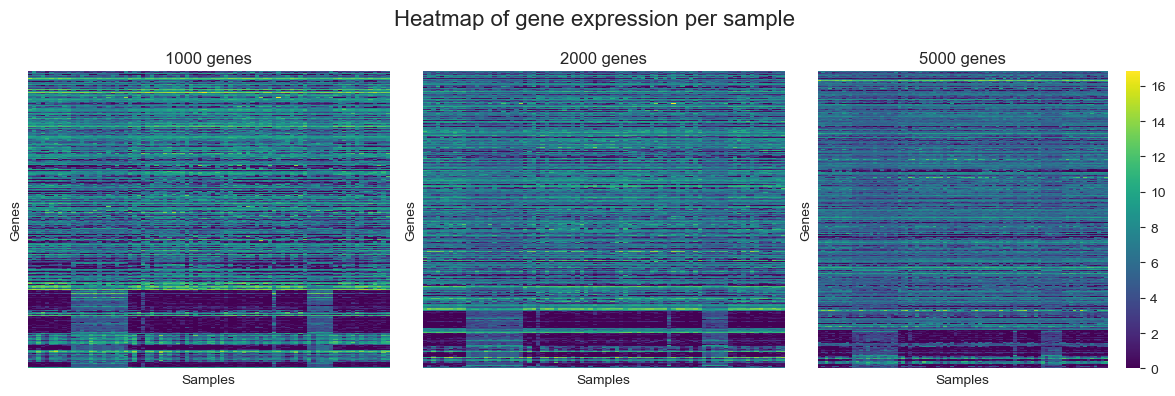

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

sns.heatmap(hm_1000_subset.drop(columns=['row_numbers']), ax=axes[0], cmap='viridis', xticklabels=False, yticklabels=False, cbar=False)
axes[0].set_title('1000 genes')
sns.heatmap(hm_2000_subset.drop(columns=['row_numbers']), ax=axes[1], cmap='viridis', xticklabels=False, yticklabels=False, cbar=False)
axes[1].set_title('2000 genes')
sns.heatmap(hm_5000_subset.drop(columns=['row_numbers']), ax=axes[2], cmap='viridis', xticklabels=False, yticklabels=False,)
axes[2].set_title('5000 genes')

for ax in axes:
    ax.set_xlabel('Samples')
    ax.set_ylabel('Genes')
plt.suptitle('Heatmap of gene expression per sample', fontsize=16)

plt.tight_layout()
plt.savefig('/Volumes/TOSHIBA EXT/4t curs/Advanced Bioinformatics/Project/Python/Graphs/heatmaps_3.png')